In [19]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

%reload_ext autoreload
%autoreload 2

In [20]:
# read data (ignore burnout, 1000 timesteps at beginning
data = pandas.read_csv("./data/MI_timesteps.txt", delimiter=" ")
data = np.array(data, dtype=float)
data = data[1000:, :]

In [36]:
# create the windows of size 351 * 3 = 1053
delay = 351
embedded = np.empty((data.shape[0] - delay, delay * 3))
for i in range(embedded.shape[0]):
    embedded[i] = data[i:i+delay, 1:4].reshape(-1)

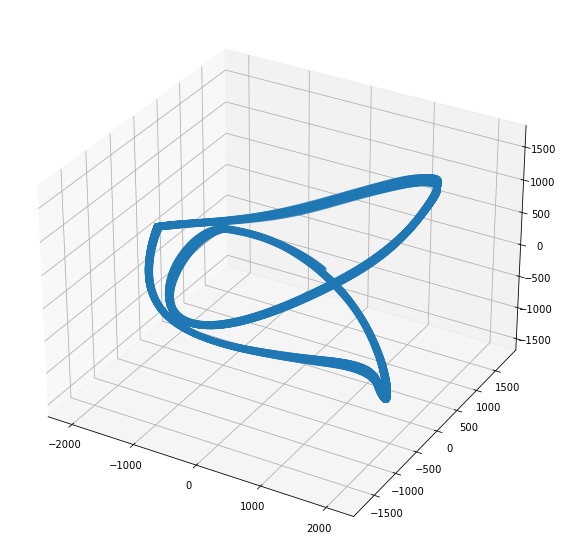

In [37]:
# apply pca on this embedded data (number of components in PCA is 3)
pca = PCA(n_components=3)
pca.fit(embedded)
projection = pca.transform(embedded)

# plot projected data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.scatter(projection[:, 0], projection[:, 1], projection[:, 2]);

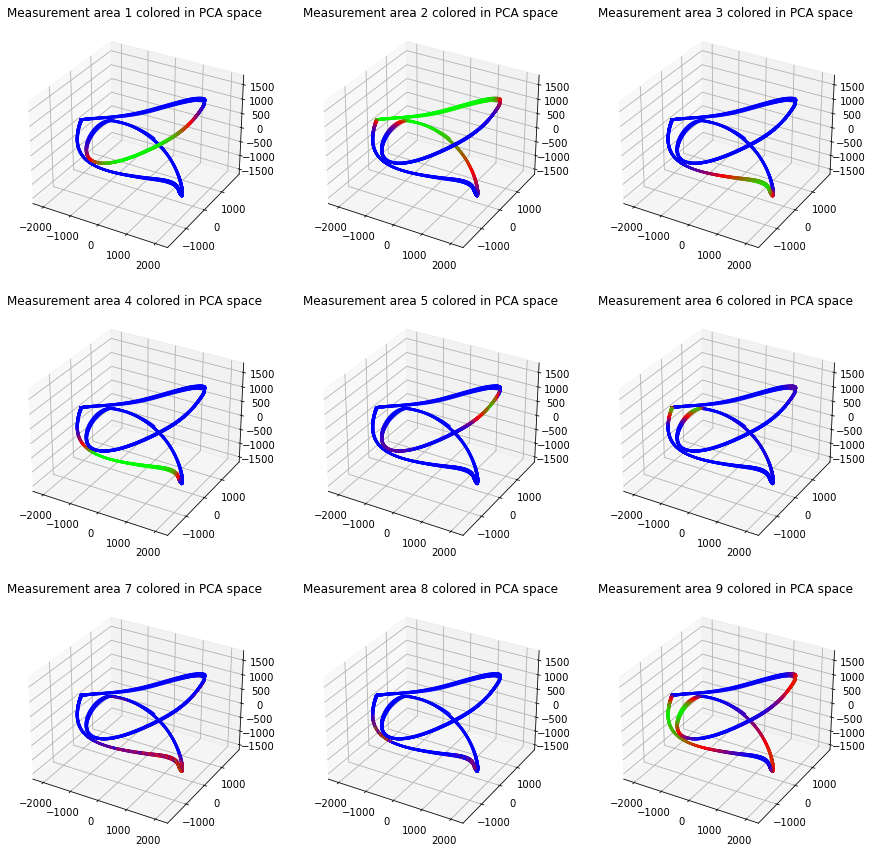

In [48]:
# color different measurement areas in the PCA space
fig = plt.figure(figsize=(15, 15))
for i in range(1, 10):
    ax = fig.add_subplot(3, 3, i, projection="3d")
    ax.scatter(projection[:, 0], projection[:, 1], projection[:, 2], s=1, c=data[delay:, i], cmap="brg")
    ax.set_title("Measurement area " + str(i) + " colored in PCA space")